## Play with the input parameters of the code below (see the #Comments in the code to identify the purposes of various parts). When you are ready to start, use the code to answer the questions below. Be mindful that you only have one attempt to answer the questions, but unlimited attempts to play with the simulation.

In [1]:
import numpy as np

In [6]:
#This code runs growth models using for loops and if statements
#Type of model to run: 1 = exponential; 2 = logistic -- student choice 
modeltype = 2;

#Input parameters -- student choice
N0 = 1; #Initial population size
r = .1; #Population growth rate
K = 100; #Carrying capacity [only pertains to logistic]
t = 200; #Number of generations


In [7]:
# Make the "storage variables"
generation = np.linspace(0, t, t + 1)
dNdt = np.zeros_like(generation)
population = np.zeros_like(generation)

In [8]:
# "If" statement selects appropriate model
if modeltype == 1:   # run the exponential growth model
    for i in range(1, len(generation)):
        if i == 1:   # The generation has population = N0
            population[i] = N0
            dNdt[i] = r * population[i]
        else:
            population[i] = population[i - 1] + dNdt[i - 1]
            dNdt[i] = r * population[i]

elif modeltype == 2:   # run the logistic growth model
    for i in range(1, len(generation)):
        if i == 1:
            population[i] = N0
            dNdt[i] = r * population[i] * (1 - population[i] / K)
        else:
            population[i] = population[i - 1] + dNdt[i - 1]
            dNdt[i] = r * population[i] * (1 - population[i] / K)

else:
    print('Error: Choose 1 for exponential model or 2 for logistic model')


Bad key "text.kerning_factor" on line 4 in
/Users/haoran/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/haoran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


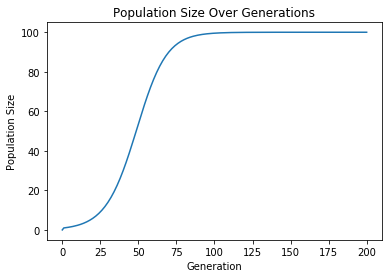

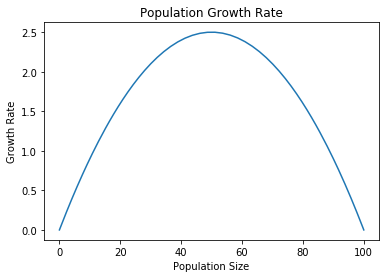

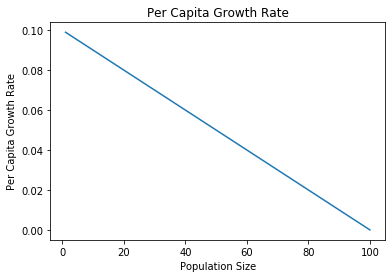

In [9]:
# Make a plot to look at your results

import matplotlib.pyplot as plt


plt.figure(1)
plt.plot(generation, population)
plt.xlabel('Generation')
plt.ylabel('Population Size')
plt.title('Population Size Over Generations')

plt.figure(2)
plt.plot(population, dNdt)
plt.xlabel('Population Size')
plt.ylabel('Growth Rate')
plt.title('Population Growth Rate')

plt.figure(3)
plt.plot(population, dNdt / population)
plt.xlabel('Population Size')
plt.ylabel('Per Capita Growth Rate')
plt.title('Per Capita Growth Rate')

plt.show()
